---

## Importando bibliotecas e conjunto de dados ##

In [379]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings 

pd.set_option('display.max_columns', 500)

warnings.filterwarnings('ignore') 
  
sns.set(style="whitegrid")
#colors = ["#115f9a", "#1984c5", "#22a7f0", "#48b5c4", "#76c68f", "#a6d75b", "#c9e52f", "#d0ee11", "#d0f400"]
colors = ['#fde725', '#5ec962', '#21918c', '#3b528b', '#440154']

In [380]:
data = pd.read_csv('Data\ml_project1_data.csv')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [381]:
# data.info()

* AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
* Complain - 1 if customer complained in the last 2 years
* DtCustomer - date of customer’s enrolment with the company
* Education - customer’s level of education
* Marital - customer’s marital status
* Kidhome - number of small children in customer’s household
* Teenhome - number of teenagers in customer’s household
* Income - customer’s yearly household income
* MntFishProducts - amount spent on fish products in the last 2 years
* MntMeatProducts - amount spent on meat products in the last 2 years
* MntFruits - amount spent on fruits products in the last 2 years
* MntSweetProducts - amount spent on sweet products in the last 2 years
* MntWines - amount spent on wine products in the last 2 years
* MntGoldProds - amount spent on gold products in the last 2 years
* NumDealsPurchases - number of purchases made with discount
* NumCatalogPurchases - number of purchases made using catalogue
* NumStorePurchases - number of purchases made directly in stores
* NumWebPurchases - number of purchases made through company’s web site
* NumWebVisitsMonth - number of visits to company’s web site in the last month
* Recency - number of days since the last purchase

Dataset de 2014

---

## Início Análise Exploratória ##

#### Análise Exploratória e Data Prep variáveis não qualitativas


In [382]:
data.loc[((data['AcceptedCmp1']== 1) | (data['AcceptedCmp2']== 1) | (data['AcceptedCmp3']== 1) | (data['AcceptedCmp4']== 1) | (data['AcceptedCmp5']== 1)) , 'Aceitou_alguma_campanha'] = 1
data.loc[((data['AcceptedCmp1']!= 1) & (data['AcceptedCmp2']!= 1) & (data['AcceptedCmp3']!= 1) & (data['AcceptedCmp4']!= 1) & (data['AcceptedCmp5']!= 1)) , 'Aceitou_alguma_campanha'] = 0
data.drop(columns= ['ID','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'], inplace = True)
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Aceitou_alguma_campanha
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,3,11,1,0.0
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,3,11,0,0.0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,3,11,0,0.0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,3,11,0,0.0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,3,11,0,0.0


In [383]:
data['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [384]:
data.loc[((data['Education']=="2n Cycle") | (data['Education']=="Basic")) , 'Educ_Basica'] = 1
data.loc[((data['Education']!="2n Cycle") & (data['Education']!="Basic")) , 'Educ_Basica'] = 0

data.loc[(data['Education']=="Graduation") , 'Ensino_Superior'] = 1
data.loc[(data['Education']!="Graduation") , 'Ensino_Superior'] = 0

data.loc[((data['Education']=="PhD") | (data['Education']=="Master")) , 'Pos_Graduacao'] = 1
data.loc[((data['Education']!="PhD") & (data['Education']!="Master")) , 'Pos_Graduacao'] = 0

data.drop(columns= ['Education'], inplace = True)
data.head()

,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Aceitou_alguma_campanha,Educ_Basica,Ensino_Superior,Pos_Graduacao
0,1957,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,3,11,1,0.0,0.0,1.0,0.0
1,1954,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,3,11,0,0.0,0.0,1.0,0.0
2,1965,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,3,11,0,0.0,0.0,1.0,0.0
3,1984,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,3,11,0,0.0,0.0,1.0,0.0
4,1981,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,3,11,0,0.0,0.0,0.0,1.0


In [385]:
data['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [386]:
data.loc[((data['Marital_Status']=="Single") | (data['Marital_Status']=="Alone") | (data['Marital_Status']=="Absurd") | (data['Marital_Status']=="YOLO")) , 'Solteiro'] = 1
data.loc[((data['Marital_Status']!="Single") & (data['Marital_Status']!="Alone") & (data['Marital_Status']!="Absurd") & (data['Marital_Status']!="YOLO")) , 'Solteiro']  = 0

data.loc[((data['Marital_Status']=="Married") | (data['Marital_Status']=="Together")) , 'Casal'] = 1
data.loc[((data['Marital_Status']!="Married") & (data['Marital_Status']!="Together")) , 'Casal'] = 0

data.loc[((data['Marital_Status']=="Divorced") | (data['Marital_Status']=="Widow")) , 'Ex_Casal'] = 1
data.loc[((data['Marital_Status']!="Divorced") & (data['Marital_Status']!="Widow")) , 'Ex_Casal'] = 0

data.drop(columns= ['Marital_Status'], inplace = True)
data.head()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Aceitou_alguma_campanha,Educ_Basica,Ensino_Superior,Pos_Graduacao,Solteiro,Casal,Ex_Casal
0,1957,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,3,11,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1954,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,3,11,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1965,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,3,11,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1984,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,3,11,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1981,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,3,11,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [387]:
data['Fidelizacao_anos'] = 2014 - pd.to_datetime(data['Dt_Customer']).dt.year

data.drop(columns= ['Dt_Customer'], inplace = True)
data.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Aceitou_alguma_campanha,Educ_Basica,Ensino_Superior,Pos_Graduacao,Solteiro,Casal,Ex_Casal,Fidelizacao_anos
0,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,3,11,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2
1,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,3,11,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
2,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,3,11,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
3,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,3,11,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
4,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,3,11,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0


#### Análise Exploratória e Data Prep variáveis qualitativas


In [388]:
data['Z_CostContact'].value_counts()

Z_CostContact
3    2240
Name: count, dtype: int64

In [389]:
data['Z_Revenue'].value_counts()

Z_Revenue
11    2240
Name: count, dtype: int64

In [390]:
data.drop(columns= ['Z_CostContact','Z_Revenue'], inplace = True)
data.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Aceitou_alguma_campanha,Educ_Basica,Ensino_Superior,Pos_Graduacao,Solteiro,Casal,Ex_Casal,Fidelizacao_anos
0,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2
1,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
2,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
3,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
4,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0


In [391]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_Birth               2240 non-null   int64  
 1   Income                   2216 non-null   float64
 2   Kidhome                  2240 non-null   int64  
 3   Teenhome                 2240 non-null   int64  
 4   Recency                  2240 non-null   int64  
 5   MntWines                 2240 non-null   int64  
 6   MntFruits                2240 non-null   int64  
 7   MntMeatProducts          2240 non-null   int64  
 8   MntFishProducts          2240 non-null   int64  
 9   MntSweetProducts         2240 non-null   int64  
 10  MntGoldProds             2240 non-null   int64  
 11  NumDealsPurchases        2240 non-null   int64  
 12  NumWebPurchases          2240 non-null   int64  
 13  NumCatalogPurchases      2240 non-null   int64  
 14  NumStorePurchases       

Verificando valores absurdos de idade

In [392]:
valor_minimo = min( 2014 - data['Year_Birth'])
valor_maximo = max( 2014 - data['Year_Birth'])
print(f"O(a) cliente mais novo tem {valor_minimo} anos e o(a) cliente mais velho(a) tem {valor_maximo} anos.")


O(a) cliente mais novo tem 18 anos e o(a) cliente mais velho(a) tem 121 anos.


Verificando quais clientes têm mais de 100 anos de idade

In [393]:
data['Idade'] = 2014 - data['Year_Birth']

# Filtrar clientes com mais de 100 anos
pessoas_mais_de_100 = data[data['Idade'] > 100]

# Exibir as informações desses clientes
print(pessoas_mais_de_100[['Idade', 'Income']])

     Idade   Income
192    114  36640.0
239    121  60182.0
339    115  83532.0


Excluindo linhas de clientes com mais de 100 anos de idade

In [394]:
data_cleaned = data[data['Idade'] <= 100]
valor_minimo_cleaned = min( 2014 - data_cleaned['Year_Birth'])
valor_maximo_cleaned = max( 2014 - data_cleaned['Year_Birth'])
print(f"O(a) cliente mais novo tem {valor_minimo_cleaned} anos e o(a) cliente mais velho(a) tem {valor_maximo_cleaned} anos.")


O(a) cliente mais novo tem 18 anos e o(a) cliente mais velho(a) tem 74 anos.


In [395]:
data_cleaned.drop(columns= ['Year_Birth'], inplace = True)
data_cleaned.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Aceitou_alguma_campanha,Educ_Basica,Ensino_Superior,Pos_Graduacao,Solteiro,Casal,Ex_Casal,Fidelizacao_anos,Idade
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2,57
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,60
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,49
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,30
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,33


Verificando dados faltantes

In [396]:
# Verificação de dados faltantes
missing_data = data_cleaned.isnull().sum()
colunas_com_faltantes = missing_data[missing_data > 0]
print(f"A(s) coluna(s) com dados faltantes é(são): {colunas_com_faltantes}")

A(s) coluna(s) com dados faltantes é(são): Income    24
dtype: int64


In [397]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2237 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   2213 non-null   float64
 1   Kidhome                  2237 non-null   int64  
 2   Teenhome                 2237 non-null   int64  
 3   Recency                  2237 non-null   int64  
 4   MntWines                 2237 non-null   int64  
 5   MntFruits                2237 non-null   int64  
 6   MntMeatProducts          2237 non-null   int64  
 7   MntFishProducts          2237 non-null   int64  
 8   MntSweetProducts         2237 non-null   int64  
 9   MntGoldProds             2237 non-null   int64  
 10  NumDealsPurchases        2237 non-null   int64  
 11  NumWebPurchases          2237 non-null   int64  
 12  NumCatalogPurchases      2237 non-null   int64  
 13  NumStorePurchases        2237 non-null   int64  
 14  NumWebVisitsMonth        2237

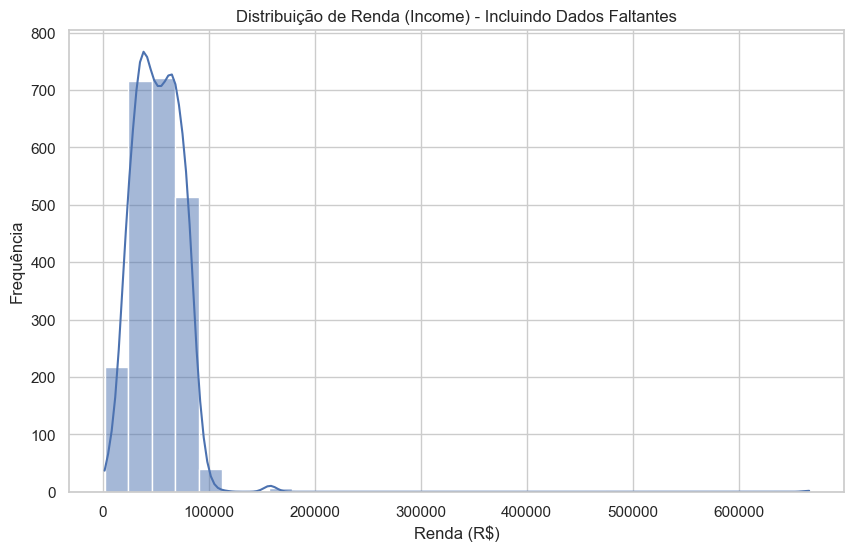

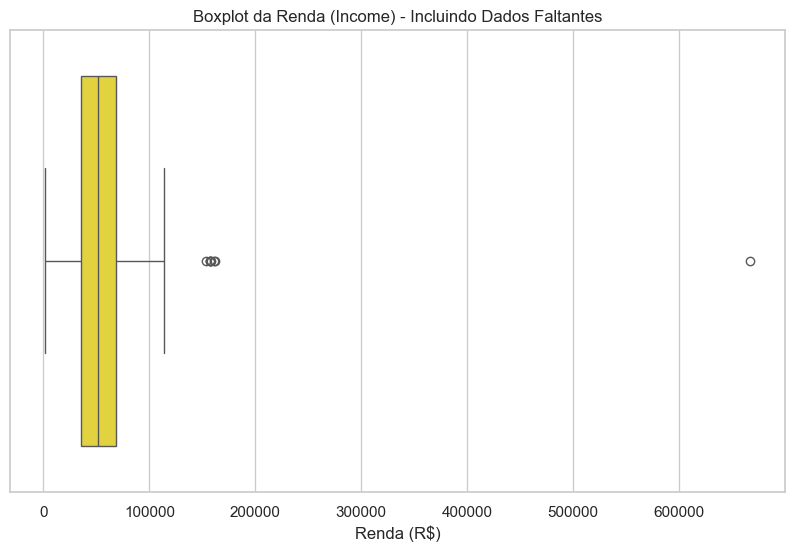

Algumas estatísticas da coluna 'Income': 
count      2213.000000
mean      52236.581563
std       25178.603047
min        1730.000000
25%       35246.000000
50%       51373.000000
75%       68487.000000
max      666666.000000
Name: Income, dtype: float64


In [398]:
# Análise de Distribuição para 'Income' incluindo valores faltantes

# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Income'], bins=30, kde=True, palette=colors)
plt.title('Distribuição de Renda (Income) - Incluindo Dados Faltantes')
plt.xlabel('Renda (R$)')
plt.ylabel('Frequência')
plt.show()

# Criando o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_cleaned['Income'], palette=colors)
plt.title('Boxplot da Renda (Income) - Incluindo Dados Faltantes')
plt.xlabel('Renda (R$)')
plt.show()

# Estatísticas Descritivas
income_statistics = data_cleaned['Income'].describe()
print("Algumas estatísticas da coluna 'Income': ")
print(income_statistics)

Como a distribuição dos dados da coluna 'Income' é aproximadamente normal, vamos substituir os dados faltantes usando a mediana dos outros dados

In [399]:
# Calculando a mediana da coluna 'Income'
mediana_income = data_cleaned['Income'].median()

# Substituindo os valores faltantes em 'Income' pela mediana
data_cleaned['Income'].fillna(mediana_income, inplace=True)

# Verificando se ainda existem valores faltantes em 'Income'
print(f"Valores faltantes em 'Income' após a imputação: {data_cleaned['Income'].isnull().sum()}")


Valores faltantes em 'Income' após a imputação: 0


In [400]:
data['Kidhome'].value_counts()

Kidhome
0    1293
1     899
2      48
Name: count, dtype: int64

In [401]:
data_cleaned = data_cleaned.rename(
                columns={'Income': 'Renda', 'Kidhome': 'Num_criancas', 'Teenhome': 'Num_adolesc', 'Recency': 'Dias_desde_ult_compr' ,
                         'MntWines': 'Gasto_vinhos', 'MntFruits': 'Gasto_frutas', 'MntMeatProducts': 'Gasto_carnes', 'MntFishProducts': 'Gasto_peixe',
                        'MntSweetProducts': 'Gasto_doces', 'MntGoldProds': 'Gasto_luxo', 'NumDealsPurchases': 'Num_compras_promocao', 'NumWebPurchases': 'Num_compras_site',  
                        'NumCatalogPurchases': 'Num_compras_catalogo', 'NumStorePurchases': 'Num_compras_loja', 'NumWebVisitsMonth': 'Num_vis_site_ult_mes', 
                        'Complain': 'Reclamou',  
                        })
data_cleaned.head()

,Renda,Num_criancas,Num_adolesc,Dias_desde_ult_compr,Gasto_vinhos,Gasto_frutas,Gasto_carnes,Gasto_peixe,Gasto_doces,Gasto_luxo,Num_compras_promocao,Num_compras_site,Num_compras_catalogo,Num_compras_loja,Num_vis_site_ult_mes,Reclamou,Response,Aceitou_alguma_campanha,Educ_Basica,Ensino_Superior,Pos_Graduacao,Solteiro,Casal,Ex_Casal,Fidelizacao_anos,Idade
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2,57
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,60
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,49
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,30
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,33


## Análise do Perfil de Cliente ##

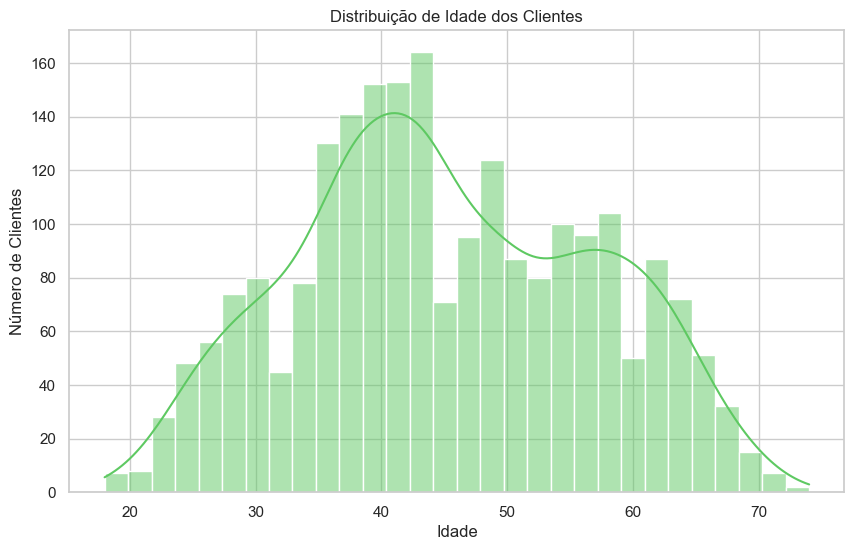

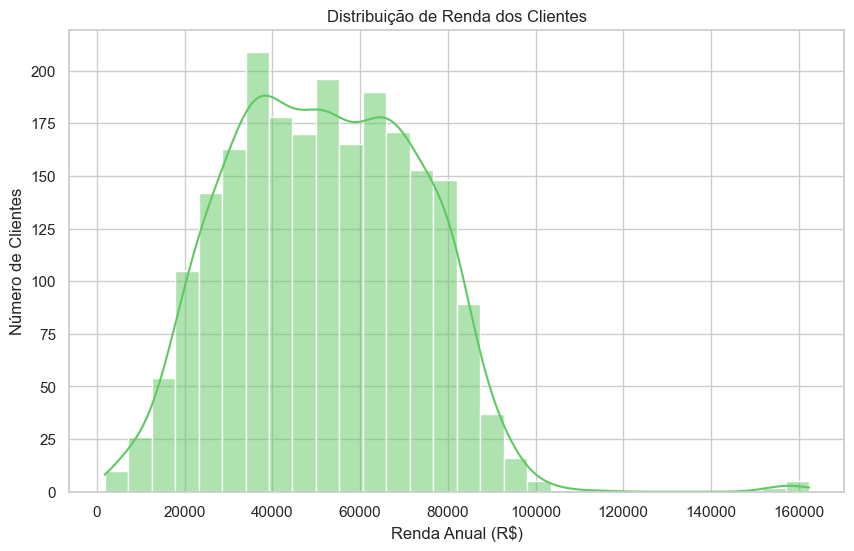

In [402]:
# Plotando a distribuição de idade
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Idade'], bins=30, kde=True, color=colors[1])
plt.title('Distribuição de Idade dos Clientes')
plt.xlabel('Idade')
plt.ylabel('Número de Clientes')
plt.show()

# Plotando a distribuição de renda
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned[data_cleaned['Renda'] < 200000]['Renda'], bins=30, kde=True, color=colors[1])  # Filtrando valores extremamente altos para melhor visualização
plt.title('Distribuição de Renda dos Clientes')
plt.xlabel('Renda Anual (R$)')
plt.ylabel('Número de Clientes')
plt.show()

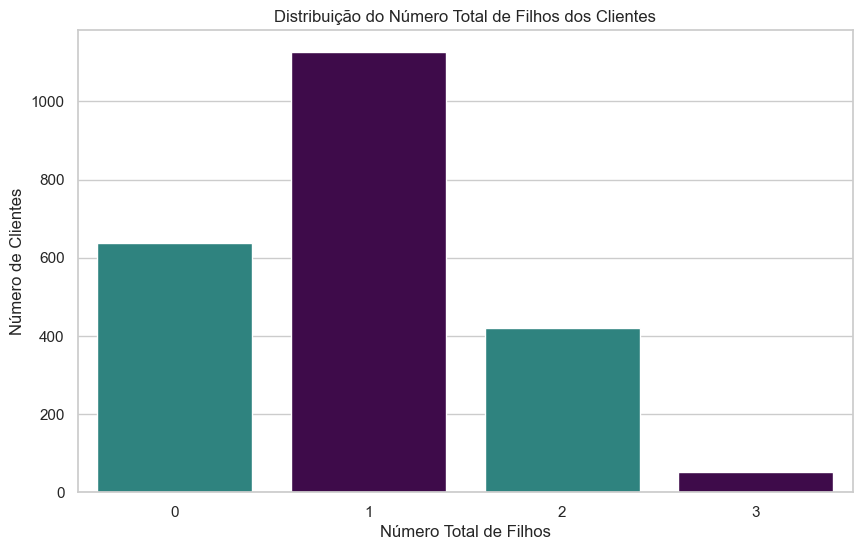

In [403]:
colors2 = ['#21918c', '#440154']

# Plotando a distribuição do número total de filhos
plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, x=data_cleaned['Num_criancas'] + data_cleaned['Num_adolesc'], palette=colors2)
plt.title('Distribuição do Número Total de Filhos dos Clientes')
plt.xlabel('Número Total de Filhos')
plt.ylabel('Número de Clientes')
plt.show()

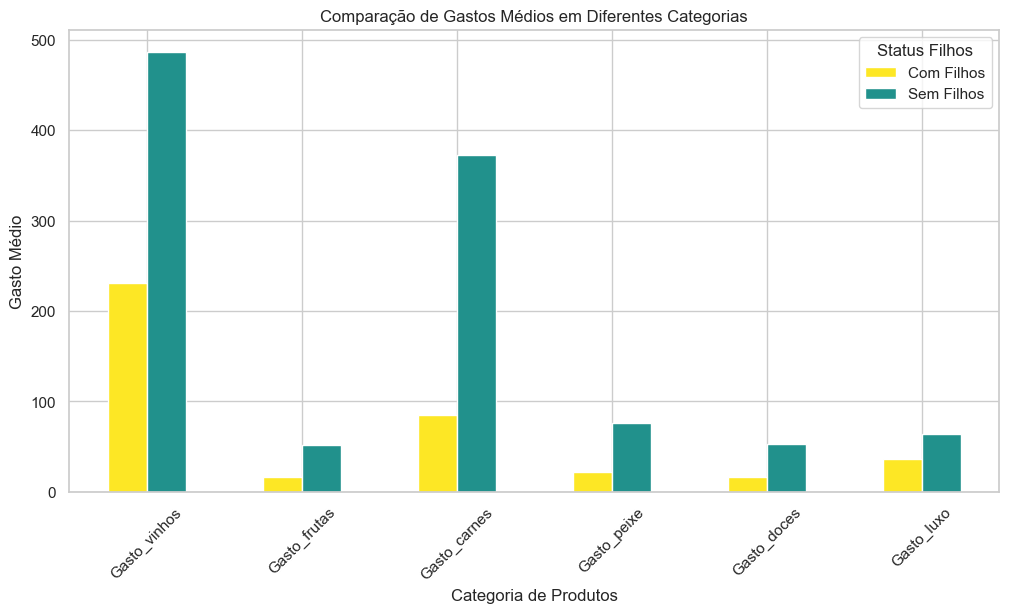

In [404]:
# Criando a coluna 'Status Filhos'
data_cleaned['Status_Filhos'] = data_cleaned.apply(lambda row: 'Com Filhos' if row['Num_criancas'] > 0 or row['Num_adolesc'] > 0 else 'Sem Filhos', axis=1)

colors2 = ['#fde725', '#21918c']

# Lista de categorias de produtos
categorias = ['Gasto_vinhos', 'Gasto_frutas', 'Gasto_carnes', 'Gasto_peixe', 'Gasto_doces','Gasto_luxo']

# Comparando o gasto médio em diferentes categorias entre os dois grupos
gastos_medios = data_cleaned.groupby('Status_Filhos')[categorias].mean()

# Plotando os resultados
gastos_medios.T.plot(kind='bar', figsize=(12, 6), color=colors2)
plt.title('Comparação de Gastos Médios em Diferentes Categorias')
plt.xlabel('Categoria de Produtos')
plt.ylabel('Gasto Médio')
plt.xticks(rotation=45)
plt.legend(title='Status Filhos')
plt.show()


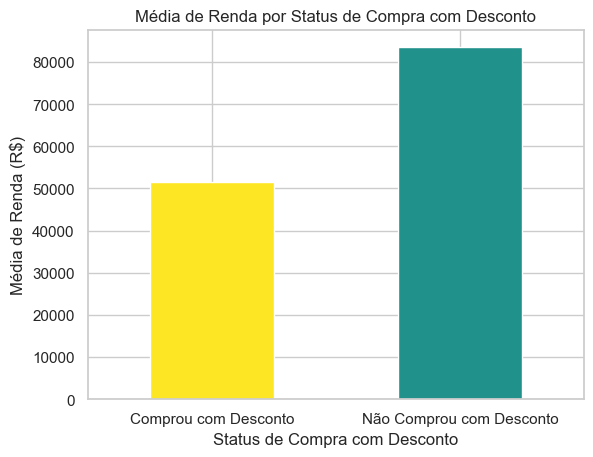

In [405]:
# Categorizar clientes com base em compras com desconto
data_cleaned['Compra_Desconto'] = data_cleaned['Num_compras_promocao'].apply(lambda x: 'Comprou com Desconto' if x > 0 else 'Não Comprou com Desconto')

# Calculando a média de renda para cada grupo
media_renda = data_cleaned.groupby('Compra_Desconto')['Renda'].mean()

# Plotando o gráfico de barras com a paleta de cores
media_renda.plot(kind='bar', color=colors2)
plt.title('Média de Renda por Status de Compra com Desconto')
plt.xlabel('Status de Compra com Desconto')
plt.ylabel('Média de Renda (R$)')
plt.xticks(rotation=0)
plt.show()

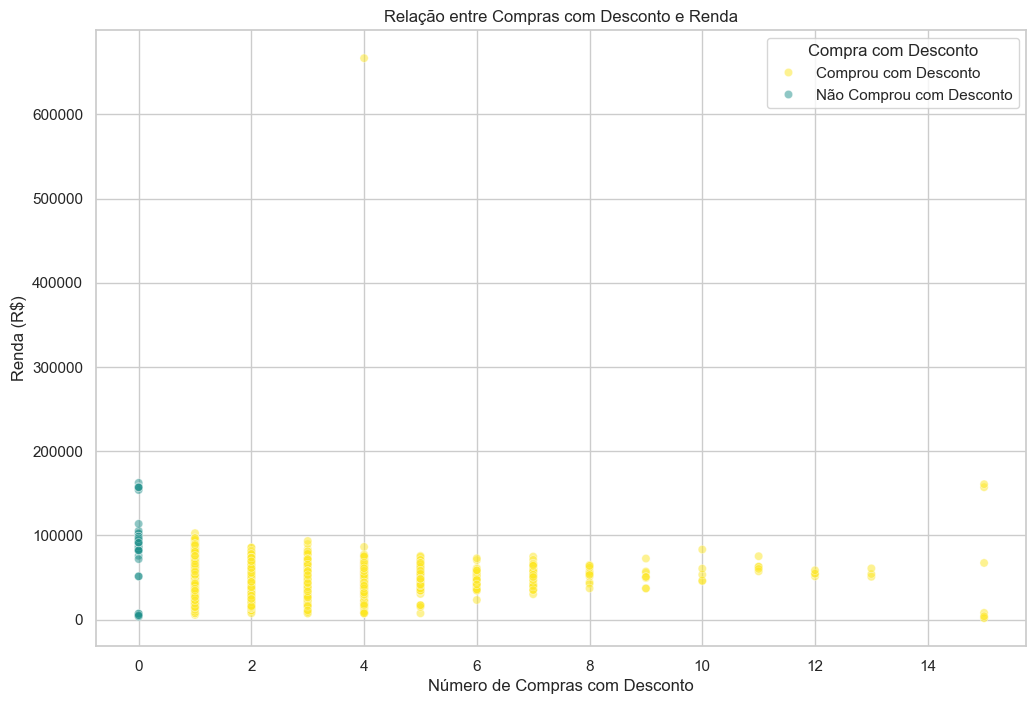

In [406]:
# Definindo cores para os grupos
colors = {'Comprou com Desconto': colors2[0], 'Não Comprou com Desconto': colors2[1]}

# Criando o gráfico de dispersão
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Num_compras_promocao', y='Renda', data=data_cleaned, hue='Compra_Desconto', palette=colors, alpha=0.5)
plt.title('Relação entre Compras com Desconto e Renda')
plt.xlabel('Número de Compras com Desconto')
plt.ylabel('Renda (R$)')
plt.legend(title='Compra com Desconto')
plt.show()


In [407]:
data_cleaned.drop(columns = [ 'Status_Filhos', 'Compra_Desconto', 'Response'], inplace = True)
data_cleaned.head(2)

,Renda,Num_criancas,Num_adolesc,Dias_desde_ult_compr,Gasto_vinhos,Gasto_frutas,Gasto_carnes,Gasto_peixe,Gasto_doces,Gasto_luxo,Num_compras_promocao,Num_compras_site,Num_compras_catalogo,Num_compras_loja,Num_vis_site_ult_mes,Reclamou,Aceitou_alguma_campanha,Educ_Basica,Ensino_Superior,Pos_Graduacao,Solteiro,Casal,Ex_Casal,Fidelizacao_anos,Idade
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2,57
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,60


In [408]:
data_cleaned.drop(columns = ['Pos_Graduacao', 'Ex_Casal'], inplace = True)
data_cleaned.head(2)

,Renda,Num_criancas,Num_adolesc,Dias_desde_ult_compr,Gasto_vinhos,Gasto_frutas,Gasto_carnes,Gasto_peixe,Gasto_doces,Gasto_luxo,Num_compras_promocao,Num_compras_site,Num_compras_catalogo,Num_compras_loja,Num_vis_site_ult_mes,Reclamou,Aceitou_alguma_campanha,Educ_Basica,Ensino_Superior,Solteiro,Casal,Fidelizacao_anos,Idade
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0.0,0.0,1.0,1.0,0.0,2,57
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0.0,0.0,1.0,1.0,0.0,0,60


In [409]:
data_cleaned['Reclamou'].value_counts()

Reclamou
0    2217
1      20
Name: count, dtype: int64

In [410]:
quali = ['Reclamou','Aceitou_alguma_campanha', 'Educ_Basica', 'Ensino_Superior','Casal','Solteiro']

In [411]:
data_cleaned[quali] = data_cleaned[quali].astype(int)

In [412]:
data_cleaned

,Renda,Num_criancas,Num_adolesc,Dias_desde_ult_compr,Gasto_vinhos,Gasto_frutas,Gasto_carnes,Gasto_peixe,Gasto_doces,Gasto_luxo,Num_compras_promocao,Num_compras_site,Num_compras_catalogo,Num_compras_loja,Num_vis_site_ult_mes,Reclamou,Aceitou_alguma_campanha,Educ_Basica,Ensino_Superior,Solteiro,Casal,Fidelizacao_anos,Idade
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,1,1,0,2,57
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,1,1,0,0,60
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,1,0,1,1,49
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,1,0,1,0,30
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,1,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,1,0,1,1,47
2236,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,1,0,0,0,1,0,68
2237,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,1,0,0,0,33
2238,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,1,0,58


---

### Clusterização

#### KMeans

In [413]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

In [414]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_cleaned)
scaled_data

array([[0.08483222, 0.        , 0.        , ..., 0.        , 1.        ,
        0.69642857],
       [0.06709518, 0.5       , 0.5       , ..., 0.        , 0.        ,
        0.75      ],
       [0.10509733, 0.        , 0.        , ..., 1.        , 0.5       ,
        0.55357143],
       ...,
       [0.08309221, 0.        , 0.        , ..., 0.        , 0.        ,
        0.26785714],
       [0.10153609, 0.        , 0.5       , ..., 1.        , 0.        ,
        0.71428571],
       [0.07690815, 0.5       , 0.5       , ..., 1.        , 1.        ,
        0.75      ]])

##### Inercias

In [415]:
def calc_inercias(X, lista_k, plot=True):
    lista_inercias = []
    
    X_df = pd.DataFrame(X, columns = [f"X{i+1}" for i in range(X.shape[1])])
    
    for k in lista_k:
        kmeans = KMeans(n_clusters = k, random_state=42)
        kmeans.fit(X)
        
        labels_clusters = kmeans.labels_
        
        #calculo da inercia
        inercia = kmeans.inertia_
        lista_inercias.append(inercia)
        
        labels_series = pd.Series(labels_clusters, name = 'label')
        df_result = pd.concat([X_df, labels_series], axis = 1)
        
        if plot and X.shape[1] == 2:
            print(f"\nInércia para clusterização com k = {k}: {inercia}")
            
            sns.jointplot(data = df_result,
                         x = 'X1',
                         y = 'X2',
                         hue = 'label')
            plt.show()
        
    return lista_inercias

In [416]:
lista_k=[2,3,4,5,6,7,8,9,10,11,12,13,14,15]
lista_inercias = calc_inercias(scaled_data, lista_k, plot=False)

In [417]:
lista_inercias

[2941.165878271556,
 2644.7770892183485,
 2520.5721189355227,
 2214.6282624152122,
 2095.1431046160005,
 1996.4578812095638,
 1881.5024038924869,
 1810.3580944141604,
 1703.6863234919413,
 1661.8653363247277,
 1629.3156492848516,
 1539.3808751152485,
 1512.9870472182415,
 1489.8387682090831]

##### Cotovelo

In [418]:
def plot_cotovelo(lista_k, lista_inercias):
    plt.figure(figsize =(8, 5))

    plt.title('Metodo do cotovelo')
    plt.plot(lista_k, lista_inercias, marker='o')

    plt.xlabel('k')
    plt.ylabel('Inércia (WCSS)')

    plt.show()

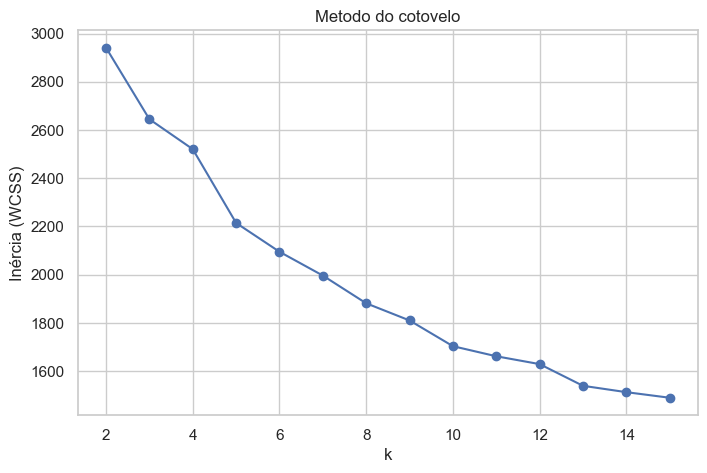

In [419]:
plot_cotovelo(lista_k, lista_inercias)

##### Silhueta

In [420]:
from sklearn.metrics import silhouette_score

def calc_silhueta(X, lista_k, plot = True):
    
    lista_silhuetas = []
    
    X_df = pd.DataFrame(X, columns = [f"X{i+1}" for i in range(X.shape[1])])
    
    for k in lista_k:
        kmeans = KMeans(n_clusters = k, random_state=42)
        kmeans.fit(X)
        
        labels_clusters = kmeans.labels_
        
        #calculo da inercia
        silhueta = silhouette_score(X_df, labels_clusters)
        lista_silhuetas.append(silhueta)
        
        labels_series = pd.Series(labels_clusters, name = 'label')
        df_result = pd.concat([X_df, labels_series], axis = 1)
        
        if plot and X.shape[1] == 2:
            print(f"\nInércia para clusterização com k = {k}: {silhueta}")
            
            sns.jointplot(data = df_result,
                         x = 'X1',
                         y = 'X2',
                         hue = 'label')
            plt.show()
        
    return lista_silhuetas

In [421]:
def plot_silhueta(X, lista_k):
    
    lista_silhuetas = calc_silhueta(X, lista_k, plot = False)
    
    plt.figure(figsize =(8, 5))
    
    plt.title("Método da silhueta")
    
    plt.plot(lista_k, lista_silhuetas, marker='o')
    
    plt.xlabel("k (# de clusters)")
    plt.ylabel("mean silhouette score")
    
    plt.show()

In [422]:
lista_silhuetas = calc_silhueta(scaled_data, range(2, 10), plot=True)

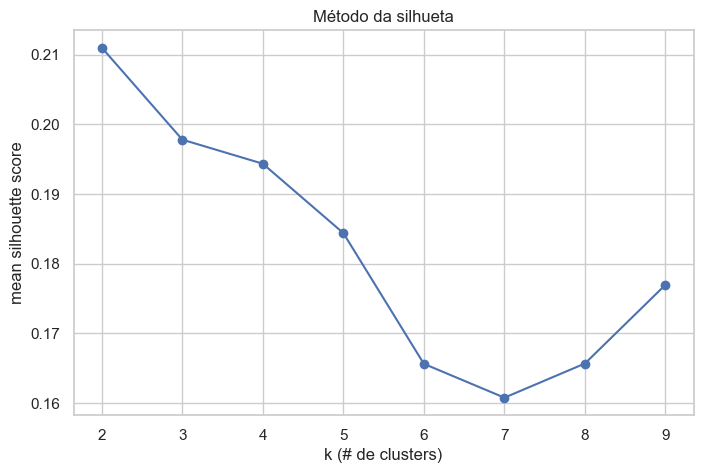

In [423]:
plot_silhueta(scaled_data, list(range(2, 10)))

In [424]:
estimador = KMeans(n_clusters = 5, random_state = 42)
modelo = estimador.fit(scaled_data)

In [425]:
modelo.predict(scaled_data)
data_cleaned['cluster'] = modelo.labels_

In [426]:
data_cleaned.head()

,Renda,Num_criancas,Num_adolesc,Dias_desde_ult_compr,Gasto_vinhos,Gasto_frutas,Gasto_carnes,Gasto_peixe,Gasto_doces,Gasto_luxo,Num_compras_promocao,Num_compras_site,Num_compras_catalogo,Num_compras_loja,Num_vis_site_ult_mes,Reclamou,Aceitou_alguma_campanha,Educ_Basica,Ensino_Superior,Solteiro,Casal,Fidelizacao_anos,Idade,cluster
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,1,1,0,2,57,2
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,1,1,0,0,60,2
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,1,0,1,1,49,4
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,1,0,1,0,30,4
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,1,0,33,0


In [427]:

df0 = data_cleaned[data_cleaned['cluster'] == 0]
df0.describe()

,Renda,Num_criancas,Num_adolesc,Dias_desde_ult_compr,Gasto_vinhos,Gasto_frutas,Gasto_carnes,Gasto_peixe,Gasto_doces,Gasto_luxo,Num_compras_promocao,Num_compras_site,Num_compras_catalogo,Num_compras_loja,Num_vis_site_ult_mes,Reclamou,Aceitou_alguma_campanha,Educ_Basica,Ensino_Superior,Solteiro,Casal,Fidelizacao_anos,Idade,cluster
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.0,575.000000,575.0,575.0,575.0,575.000000,575.000000,575.0
mean,49076.005217,0.481739,0.554783,49.255652,240.264348,19.659130,124.163478,28.606957,19.431304,31.789565,2.457391,3.674783,2.201739,5.452174,5.389565,0.005217,0.0,0.246957,0.0,0.0,1.0,0.944348,45.690435,0.0
std,21468.522527,0.543505,0.550616,29.105342,290.336492,32.891734,193.596003,46.147075,33.526864,40.936671,2.204172,2.455238,2.816885,3.144165,2.374640,0.072106,0.0,0.431617,0.0,0.0,0.0,0.683579,11.345915,0.0
min,4023.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,1.0,0.000000,18.000000,0.0
25%,33607.000000,0.000000,0.000000,23.000000,19.000000,1.000000,12.000000,2.000000,1.000000,6.000000,1.000000,2.000000,0.000000,3.000000,4.000000,0.000000,0.0,0.000000,0.0,0.0,1.0,0.000000,38.000000,0.0
50%,49187.000000,0.000000,1.000000,49.000000,108.000000,5.000000,44.000000,8.000000,6.000000,15.000000,2.000000,3.000000,1.000000,4.000000,6.000000,0.000000,0.0,0.000000,0.0,0.0,1.0,1.000000,44.000000,0.0
75%,64384.000000,1.000000,1.000000,74.000000,384.000000,22.000000,150.000000,34.000000,20.000000,40.000000,3.000000,5.000000,3.000000,7.000000,7.000000,0.000000,0.0,0.000000,0.0,0.0,1.0,1.000000,54.500000,0.0
max,162397.000000,2.000000,2.000000,99.000000,1396.000000,197.000000,1622.000000,258.000000,194.000000,232.000000,15.000000,11.000000,28.000000,13.000000,20.000000,1.000000,0.0,1.000000,0.0,0.0,1.0,2.000000,71.000000,0.0


In [428]:
df1 = data_cleaned[data_cleaned['cluster'] == 1]
df1.describe()

#Caracteristicas principais: Aceitou_alguma_campanha e fez pelo menos 1 compra em loja fisica

,Renda,Num_criancas,Num_adolesc,Dias_desde_ult_compr,Gasto_vinhos,Gasto_frutas,Gasto_carnes,Gasto_peixe,Gasto_doces,Gasto_luxo,Num_compras_promocao,Num_compras_site,Num_compras_catalogo,Num_compras_loja,Num_vis_site_ult_mes,Reclamou,Aceitou_alguma_campanha,Educ_Basica,Ensino_Superior,Solteiro,Casal,Fidelizacao_anos,Idade,cluster
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0,165.000000,165.000000,165.000000,165.0,165.000000,165.000000,165.0
mean,64337.848485,0.193939,0.369697,45.672727,599.642424,35.175758,283.096970,49.824242,40.509091,60.236364,2.024242,5.072727,4.424242,6.830303,4.593939,0.012121,1.0,0.084848,0.496970,0.606061,0.0,0.981818,45.369697,1.0
std,21035.180565,0.411674,0.532186,28.073111,400.091254,42.805993,278.709312,57.905827,48.752688,54.768792,1.915761,2.555634,2.747841,3.207507,2.431744,0.109760,0.0,0.279504,0.501513,0.490109,0.0,0.719694,13.262005,0.0
min,11012.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.0,0.000000,19.000000,1.0
25%,50388.000000,0.000000,0.000000,23.000000,212.000000,4.000000,56.000000,6.000000,2.000000,24.000000,1.000000,3.000000,2.000000,4.000000,3.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.0,0.000000,35.000000,1.0
50%,67384.000000,0.000000,0.000000,40.000000,581.000000,20.000000,172.000000,29.000000,17.000000,39.000000,1.000000,5.000000,4.000000,7.000000,4.000000,0.000000,1.0,0.000000,0.000000,1.000000,0.0,1.000000,45.000000,1.0
75%,81246.000000,0.000000,1.000000,70.000000,928.000000,48.000000,501.000000,68.000000,66.000000,79.000000,3.000000,7.000000,6.000000,9.000000,7.000000,0.000000,1.0,0.000000,1.000000,1.000000,0.0,1.000000,55.000000,1.0
max,102692.000000,2.000000,2.000000,98.000000,1462.000000,190.000000,974.000000,250.000000,194.000000,245.000000,11.000000,11.000000,11.000000,13.000000,9.000000,1.000000,1.0,1.000000,1.000000,1.000000,0.0,2.000000,71.000000,1.0


In [429]:
df2 = data_cleaned[data_cleaned['cluster'] == 2]
df2.describe()

#Caracteristicas principais: Aceitou_alguma_campanha e fez pelo menos 1 compra em loja fisica

,Renda,Num_criancas,Num_adolesc,Dias_desde_ult_compr,Gasto_vinhos,Gasto_frutas,Gasto_carnes,Gasto_peixe,Gasto_doces,Gasto_luxo,Num_compras_promocao,Num_compras_site,Num_compras_catalogo,Num_compras_loja,Num_vis_site_ult_mes,Reclamou,Aceitou_alguma_campanha,Educ_Basica,Ensino_Superior,Solteiro,Casal,Fidelizacao_anos,Idade,cluster
count,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.0,629.000000,629.000000,629.000000,629.0,629.000000,629.000000,629.0
mean,48876.111288,0.488076,0.513514,50.195548,230.750397,25.705882,144.538951,35.990461,24.979332,42.459459,2.316375,3.833068,2.244833,5.496025,5.494436,0.007949,0.0,0.109698,0.518283,0.613672,0.0,0.977742,45.004769,2.0
std,20244.665569,0.542993,0.540015,28.697160,270.765016,40.497004,199.886052,54.859315,40.361202,52.561766,1.798815,2.974807,2.630146,3.231818,2.507705,0.088873,0.0,0.312762,0.500063,0.487295,0.0,0.676833,11.790973,0.0
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,19.000000,2.0
25%,33462.000000,0.000000,0.000000,27.000000,19.000000,2.000000,13.000000,2.000000,1.000000,7.000000,1.000000,2.000000,0.000000,3.000000,4.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.000000,37.000000,2.0
50%,47682.000000,0.000000,0.000000,51.000000,101.000000,7.000000,50.000000,11.000000,7.000000,22.000000,2.000000,3.000000,1.000000,4.000000,6.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.0,1.000000,44.000000,2.0
75%,64108.000000,1.000000,1.000000,75.000000,379.000000,29.000000,212.000000,46.000000,30.000000,54.000000,3.000000,5.000000,3.000000,8.000000,7.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.0,1.000000,55.000000,2.0
max,153924.000000,2.000000,2.000000,99.000000,1288.000000,199.000000,984.000000,259.000000,263.000000,362.000000,15.000000,27.000000,11.000000,13.000000,20.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,2.000000,74.000000,2.0


#### AgglomerativeClustering

In [430]:
X_shc = data_cleaned.loc[:, ['Num_vis_site_ult_mes', 'Num_compras_site']].values
X_shc

array([[7, 8],
       [5, 1],
       [4, 8],
       ...,
       [6, 2],
       [3, 6],
       [7, 3]], dtype=int64)

In [431]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 4, linkage = 'ward')
y_hc = hc.fit_predict(X_shc)

Text(0, 0.5, 'Num_compras_site')

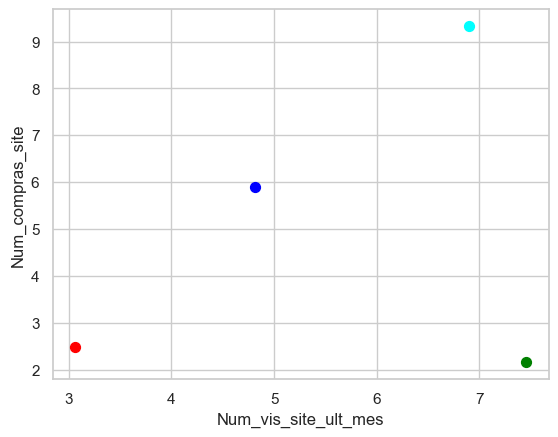

In [432]:
import numpy as np
plt.scatter(np.mean(X_shc[y_hc == 0, 0]), np.mean(X_shc[y_hc == 0, 1]), s = 50 , c = 'red')
plt.scatter(np.mean(X_shc[y_hc == 1, 0]), np.mean(X_shc[y_hc == 1, 1]), s = 50 , c = 'blue')
plt.scatter(np.mean(X_shc[y_hc == 2, 0]), np.mean(X_shc[y_hc == 2, 1]), s = 50 , c = 'green')
plt.scatter(np.mean(X_shc[y_hc == 3, 0]), np.mean(X_shc[y_hc == 3, 1]), s = 50 , c = 'cyan')
#plt.scatter(np.mean(X_shc[y_hc == 4, 0]), np.mean(X_shc[y_hc == 4, 1]), s = 50 , c = 'magenta')

plt.xlabel('Num_vis_site_ult_mes')
plt.ylabel('Num_compras_site')

In [433]:
def HereditaryClusterer(n_clusters1, linkage1):
    data = X_shc.copy()
    hc = AgglomerativeClustering(n_clusters = n_clusters1, linkage = linkage1)
    y_hc = hc.fit_predict(data)
    import numpy as np
    plt.scatter(np.mean(data[y_hc == 0, 0]), np.mean(data[y_hc == 0, 1]), s = 50 , c = 'red')
    plt.scatter(np.mean(data[y_hc == 1, 0]), np.mean(data[y_hc == 1, 1]), s = 50 , c = 'blue')
    plt.scatter(np.mean(data[y_hc == 2, 0]), np.mean(data[y_hc == 2, 1]), s = 50 , c = 'green')
    plt.scatter(np.mean(data[y_hc == 3, 0]), np.mean(data[y_hc == 3, 1]), s = 50 , c = 'cyan')
    plt.scatter(np.mean(data[y_hc == 4, 0]), np.mean(data[y_hc == 4, 1]), s = 50 , c = 'magenta')
    plt.xlabel('Num_vis_site_ult_mes')
    plt.ylabel('Num_compras_site')

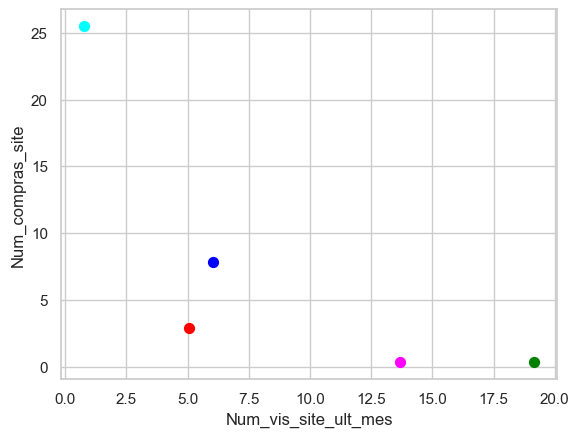

In [434]:
HereditaryClusterer(5, 'average')

In [435]:
data.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Aceitou_alguma_campanha,Educ_Basica,Ensino_Superior,Pos_Graduacao,Solteiro,Casal,Ex_Casal,Fidelizacao_anos,Idade
0,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2,57
1,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,60
2,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,49
3,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,30
4,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,33


#### Predições

In [436]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
import numpy as np

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler

from sklearn.impute import SimpleImputer

from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [437]:
def pipe_pre_process_predict(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                        random_state=42, stratify=y)
    
    ## Tratamento de numericos
    
    pipe_features_num = Pipeline([('input_num', SimpleImputer(strategy ='mean')),
                                 ('std_scaler', StandardScaler())])
    
    features_num = X_train.select_dtypes(include=np.number).columns.tolist()
    
    ## Tratamento de categóricos
    
    pipe_features_cat = Pipeline([('input_num', SimpleImputer(strategy="constant", fill_value="unknown")),
                                 ('ohc', OneHotEncoder())])
    
    features_cat = X_train.select_dtypes(exclude=np.number).columns.tolist()
    
    ## Montando o pipe final
    
    pre_processador = ColumnTransformer([("transf_num", pipe_features_num, features_num),
                                         ("transf_cat", pipe_features_cat, features_cat)])
    
    return X_train, X_test, y_train, y_test, pre_processador

In [438]:
def metricas_classificacao(estimator):
    
    # ============================================

    print("\nMétricas de avaliação de treino:")

    y_pred_train = estimator.predict(X_train)

    print(confusion_matrix(y_train, y_pred_train))

    ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
    plt.show()

    print(classification_report(y_train, y_pred_train))


    # ============================================

    print("\nMétricas de avaliação de teste:")

    y_pred_test = estimator.predict(X_test)

    print(confusion_matrix(y_test, y_pred_test))

    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
    plt.show()

    print(classification_report(y_test, y_pred_test))

In [439]:
data_pred = data.copy()
data_pred.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Aceitou_alguma_campanha,Educ_Basica,Ensino_Superior,Pos_Graduacao,Solteiro,Casal,Ex_Casal,Fidelizacao_anos,Idade
0,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2,57
1,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,60
2,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,49
3,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,30
4,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,33


In [440]:
data_pred.drop(data_pred.tail(3).index,
        inplace = True)
data_pred.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Aceitou_alguma_campanha,Educ_Basica,Ensino_Superior,Pos_Graduacao,Solteiro,Casal,Ex_Casal,Fidelizacao_anos,Idade
0,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2,57
1,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,60
2,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,49
3,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,30
4,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,33


In [441]:
X = data_pred.drop(columns='Aceitou_alguma_campanha')
y = data_pred['Aceitou_alguma_campanha']

In [442]:
X_train, X_test, y_train, y_test, pre_processador = pipe_pre_process_predict(X, y)


Métricas de avaliação de treino:
[[1418    2]
 [  78  291]]


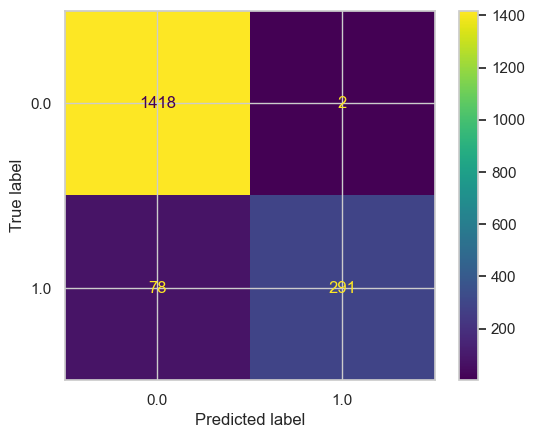

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      1420
         1.0       0.99      0.79      0.88       369

    accuracy                           0.96      1789
   macro avg       0.97      0.89      0.93      1789
weighted avg       0.96      0.96      0.95      1789


Métricas de avaliação de teste:
[[333  22]
 [ 45  48]]


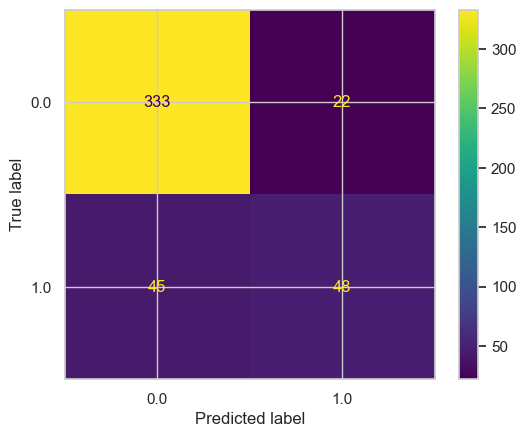

              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91       355
         1.0       0.69      0.52      0.59        93

    accuracy                           0.85       448
   macro avg       0.78      0.73      0.75       448
weighted avg       0.84      0.85      0.84       448



In [443]:
pipe_gb = Pipeline([('pre_processador', pre_processador),
                  ('gb', GradientBoostingClassifier(random_state=42, 
                                                    learning_rate = 0.01, n_estimators = 2000))])

# valores padrões para o GB: loss = 'log_loss'; learning_rate = 0.1; n_estimators = 100

pipe_gb.fit(X_train, y_train)

## Avaliacao do modelo
metricas_classificacao(pipe_gb)

----

In [444]:
data_pred_cluster = data.copy()
data_pred_cluster.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Aceitou_alguma_campanha,Educ_Basica,Ensino_Superior,Pos_Graduacao,Solteiro,Casal,Ex_Casal,Fidelizacao_anos,Idade
0,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2,57
1,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,60
2,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,49
3,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,30
4,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,33


In [445]:
data_pred_cluster['cluster'] = pd.Series(y_hc)
data_pred_cluster.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Aceitou_alguma_campanha,Educ_Basica,Ensino_Superior,Pos_Graduacao,Solteiro,Casal,Ex_Casal,Fidelizacao_anos,Idade,cluster
0,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2,57,3.0
1,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,60,0.0
2,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,49,1.0
3,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,30,2.0
4,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,33,1.0


In [446]:
X_cluster = data_pred_cluster.drop(columns='Aceitou_alguma_campanha')
y_cluster = data_pred_cluster['Aceitou_alguma_campanha']


In [447]:
X_train, X_test, y_train, y_test, pre_processador_cluster = pipe_pre_process_predict(X_cluster, y_cluster)


Métricas de avaliação de treino:
[[1421    1]
 [  76  294]]


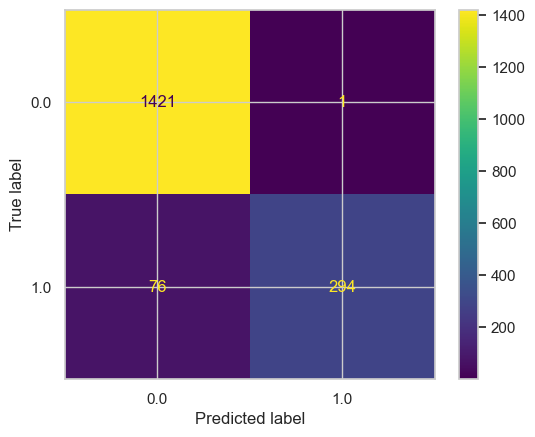

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      1422
         1.0       1.00      0.79      0.88       370

    accuracy                           0.96      1792
   macro avg       0.97      0.90      0.93      1792
weighted avg       0.96      0.96      0.96      1792


Métricas de avaliação de teste:
[[335  20]
 [ 48  45]]


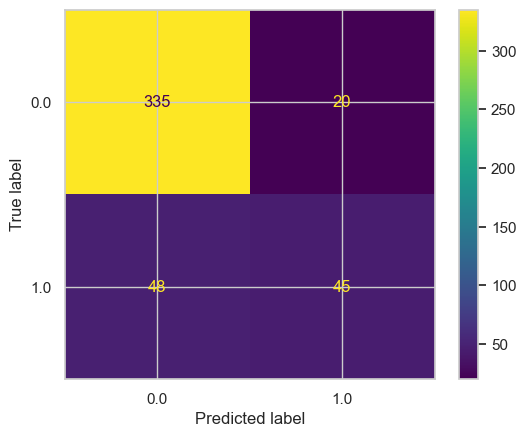

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.91       355
         1.0       0.69      0.48      0.57        93

    accuracy                           0.85       448
   macro avg       0.78      0.71      0.74       448
weighted avg       0.84      0.85      0.84       448



In [448]:
pipe_gb_cluster = Pipeline([('pre_processador', pre_processador_cluster),
                          ('gb', GradientBoostingClassifier(random_state=42, 
                                                    learning_rate = 0.01, n_estimators = 2000))])

# valores padrões para o GB: loss = 'log_loss'; learning_rate = 0.1; n_estimators = 100

pipe_gb_cluster.fit(X_train, y_train)

## Avaliacao do modelo
metricas_classificacao(pipe_gb_cluster)

**Fim do projeto**